# CNN on real images

# 1. Reading in the Data

In [1]:
import os

In [2]:
data_dir = '/home/vboxuser/Programming/Deep Learning using TensorFlow/DATA/cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir + '/test/'

In [7]:
train_path = data_dir + '/train/'

In [8]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [9]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [10]:
os.listdir(train_path + 'parasitized')[0]

'C93P54ThinF_IMG_20150821_162641_cell_217.png'

In [11]:
para_cell = train_path + 'parasitized/' + 'C93P54ThinF_IMG_20150821_162641_cell_217.png'

In [12]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [13]:
imread(para_cell).shape

(109, 109, 3)

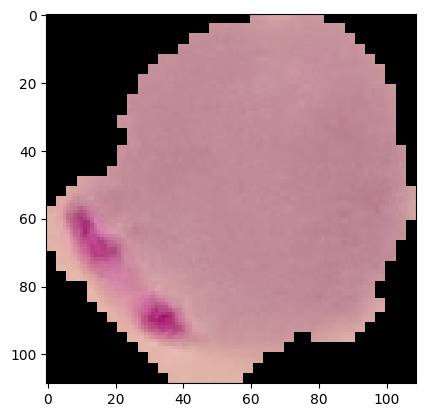

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(train_path + 'uninfected')[0]

'C131P92ThinF_IMG_20151004_151001_cell_83.png'

In [16]:
uninfected_cell = train_path + 'uninfected/' + 'C131P92ThinF_IMG_20151004_151001_cell_83.png'

In [17]:
uninfected_cell = imread(uninfected_cell)

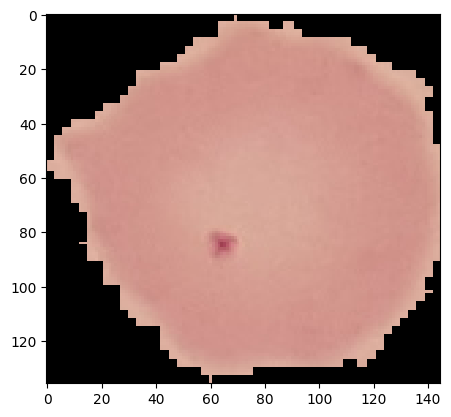

In [18]:
plt.imshow(uninfected_cell)

In [19]:
len(os.listdir(train_path + 'parasitized'))

12480

In [20]:
len(os.listdir(train_path + 'uninfected'))

12480

In [21]:
len(os.listdir(test_path + 'parasitized'))

1300

In [22]:
len(os.listdir(test_path + 'uninfected'))

1300

In [23]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path + 'uninfected'):
    img = imread(test_path + 'uninfected/' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [24]:
dim1

[115,
 142,
 118,
 127,
 133,
 181,
 103,
 106,
 166,
 133,
 133,
 133,
 133,
 124,
 151,
 127,
 142,
 106,
 106,
 127,
 133,
 148,
 151,
 136,
 157,
 175,
 157,
 127,
 118,
 121,
 85,
 172,
 97,
 118,
 148,
 154,
 169,
 130,
 136,
 148,
 115,
 121,
 136,
 139,
 106,
 97,
 142,
 136,
 130,
 124,
 136,
 130,
 127,
 130,
 127,
 118,
 106,
 148,
 130,
 133,
 130,
 130,
 145,
 121,
 124,
 193,
 172,
 133,
 133,
 100,
 142,
 118,
 124,
 103,
 136,
 124,
 118,
 139,
 118,
 121,
 121,
 124,
 124,
 112,
 145,
 145,
 211,
 115,
 145,
 130,
 130,
 139,
 157,
 115,
 133,
 118,
 130,
 121,
 121,
 109,
 130,
 124,
 118,
 133,
 121,
 103,
 133,
 139,
 130,
 112,
 115,
 118,
 136,
 112,
 154,
 127,
 139,
 130,
 115,
 97,
 115,
 151,
 163,
 127,
 97,
 115,
 109,
 130,
 127,
 136,
 121,
 118,
 130,
 124,
 127,
 124,
 127,
 154,
 136,
 124,
 109,
 106,
 127,
 160,
 139,
 142,
 133,
 133,
 148,
 133,
 154,
 118,
 133,
 124,
 121,
 142,
 133,
 130,
 94,
 136,
 103,
 106,
 136,
 136,
 136,
 145,
 130,
 121

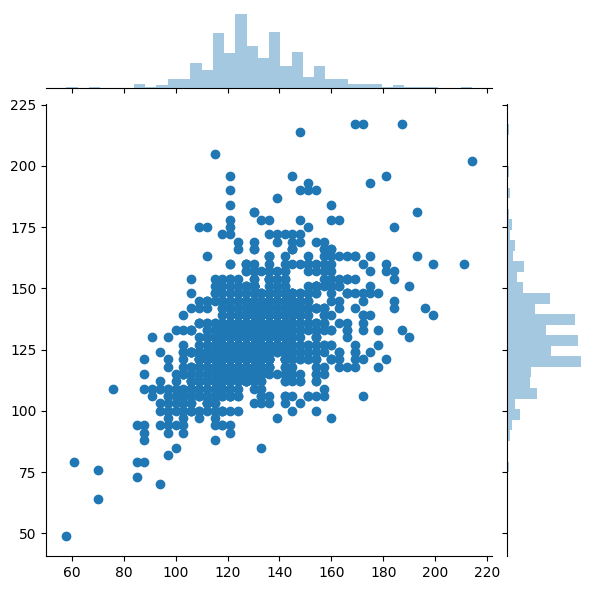

In [25]:
sns.jointplot(dim1,dim2)

In [26]:
# we have to resize all the images in same shape

In [27]:
np.mean(dim1)

130.92538461538462

In [28]:
np.mean(dim2)

130.75

In [29]:
# for all images, the image shape should be : image_shape = (130,130,3)

# 2. Data Processing

In [30]:
130*130*3

50700

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
# help(ImageDataGenerator)

In [33]:
image_gen = ImageDataGenerator(rotation_range = 20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range = 0.1,
                              zoom_range = 0.1,
                              horizontal_flip = True,
                              fill_mode = 'nearest') # already scaled images

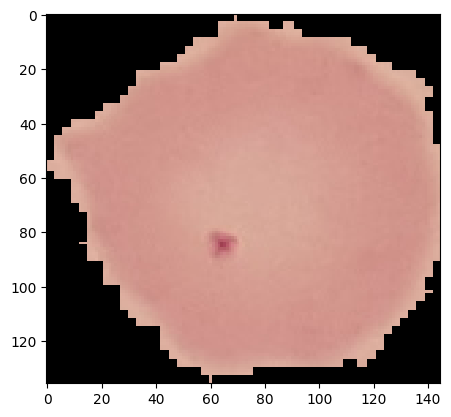

In [34]:
plt.imshow(uninfected_cell)

In [35]:
uninfected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

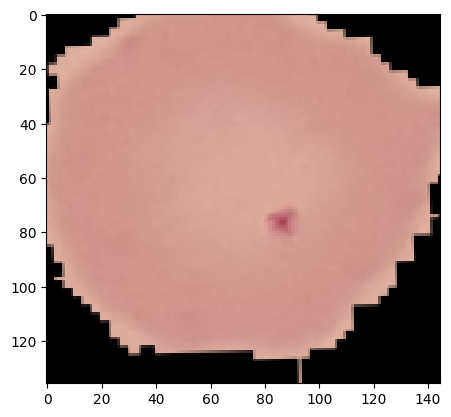

In [36]:
plt.imshow(image_gen.random_transform(uninfected_cell))

In [37]:
train_path

'/home/vboxuser/Programming/Deep Learning using TensorFlow/DATA/cell_images/train/'

In [38]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [39]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# 3. Creating the Model

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [42]:
image_shape = (130,130,3)

In [43]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# OUTPUT LAYER SOFTMAX --> MULTI CLASS
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# keras.io/metrics

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-05-28 15:31:36.827426: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2023-05-28 15:31:36.852081: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2023-05-28 15:31:36.852224: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2c21640 executing computations on platform Host. Devices:
2023-05-28 15:31:36.852239: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [47]:
batch_size = 16

In [48]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode = 'rgb',
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode = 'rgb',
                                               batch_size = batch_size,
                                               class_mode = 'binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [51]:
results = model.fit_generator(train_image_gen,epochs = 20,
                             validation_data = test_image_gen,
                             callbacks = [early_stop]) # we will use already available model in files

Epoch 1/20


2023-05-28 15:31:38.498604: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33554432 exceeds 10% of system memory.
2023-05-28 15:31:38.588493: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33554432 exceeds 10% of system memory.
2023-05-28 15:31:38.610602: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 33554432 exceeds 10% of system memory.
2023-05-28 15:31:38.638105: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 15745024 exceeds 10% of system memory.
2023-05-28 15:31:38.663317: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 15745024 exceeds 10% of system memory.


1560/1560 [==============================] - 658s 422ms/step - loss: 7.7179 - accuracy: 0.4993 - val_loss: 7.7361 - val_accuracy: 0.5000
Epoch 2/20
1560/1560 [==============================] - 627s 402ms/step - loss: 7.7689 - accuracy: 0.4960 - val_loss: 7.6431 - val_accuracy: 0.5000
Epoch 3/20
1560/1560 [==============================] - 605s 388ms/step - loss: 7.7462 - accuracy: 0.4961 - val_loss: 7.6431 - val_accuracy: 0.5000
Epoch 4/20
1560/1560 [==============================] - 577s 370ms/step - loss: 7.6880 - accuracy: 0.4987 - val_loss: 7.6431 - val_accuracy: 0.5000


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [53]:
model.history.history

{'loss': [7.717920794549284,
  7.768894249587231,
  7.746074885223068,
  7.687909000796265],
 'accuracy': [0.49931887, 0.49603334, 0.49611348, 0.49871784],
 'val_loss': [7.736132241465563,
  7.643102063723137,
  7.643102063723137,
  7.643102063723137],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5]}

In [54]:
model.evaluate_generator(test_image_gen)

[7.643102063723137, 0.5]

In [55]:
model.metrics_names

['loss', 'accuracy']

# 4. Evaluating the Model

In [56]:
pred = model.predict_generator(test_image_gen)

In [57]:
predictions = pred > 0.5

In [58]:
len(pred)

2600

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [62]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1300
           1       0.50      1.00      0.67      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



/home/vboxuser/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
confusion_matrix(test_image_gen.classes,predictions)

array([[   0, 1300],
       [   0, 1300]])

In [64]:
para_cell

'/home/vboxuser/Programming/Deep Learning using TensorFlow/DATA/cell_images/train/parasitized/C93P54ThinF_IMG_20150821_162641_cell_217.png'

In [65]:
from tensorflow.keras.preprocessing import image

In [66]:
my_image = image.load_img(para_cell,target_size =  image_shape)

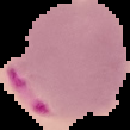

In [67]:
my_image

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [69]:
my_img_arr = image.img_to_array(my_image)

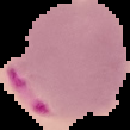

In [70]:
my_image

In [71]:
my_img_arr.shape # want shape as (1,130,130,3)

(130, 130, 3)

In [72]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [73]:
my_img_arr.shape

(1, 130, 130, 3)

In [74]:
model.predict(my_img_arr)

array([[1.]], dtype=float32)

In [76]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}